In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


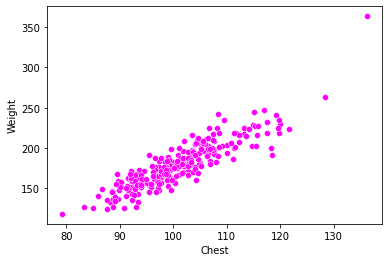

In [24]:
sns.scatterplot(data = df, x = "Chest",y = "Weight", color="magenta")

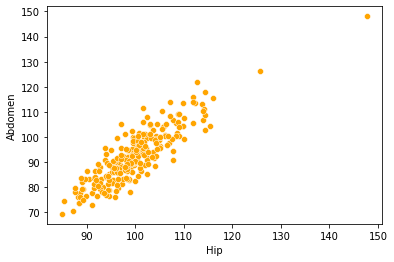

In [28]:
sns.scatterplot(data = df, x = "Hip",y = "Abdomen", color="orange")

In [7]:
data = df.copy()
data = data.drop(columns=['BodyFat','Density'], axis=1)

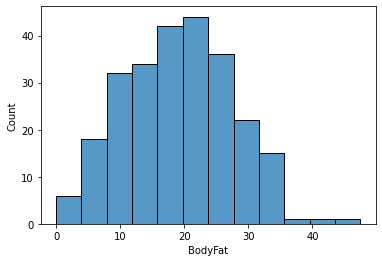

In [26]:
sns.histplot(data=df, x='BodyFat')

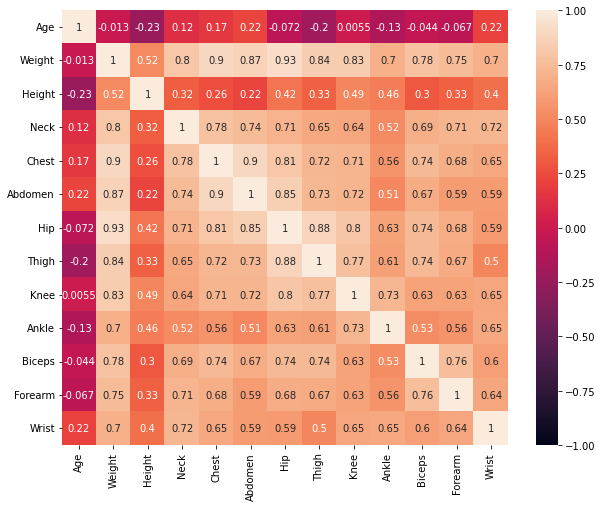

In [10]:
features = list(data.columns)
correlation = df[features].corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)
plt.show()

In [11]:
X = data
y = df['BodyFat']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Linear Regression

In [13]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
score = regr.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Score --> {score}")
print(f"RMSE --> {rmse}")

Score --> 0.6353780797292594
RMSE --> 4.451317843688742


Lasso

In [14]:
lasso_regr = Lasso(alpha=0.5)
lasso_regr.fit(X_train, y_train)
cv_score = cross_val_score(lasso_regr, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(cv_score)}")
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE --> {rmse}")

CV Score --> 0.6952036136550136
RMSE --> 4.451317843688742


Ridge

In [15]:
ridge_regr = Ridge(alpha=0.5)
ridge_regr.fit(X_train, y_train)
cv_score = cross_val_score(ridge_regr, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(cv_score)}")
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE --> {rmse}")

CV Score --> 0.6704406440872133
RMSE --> 4.451317843688742
